In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [2]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv('./data/train_03.csv')
test = pd.read_csv('./data/test_03.csv')
total = pd.concat([train, test], axis = 0)
print(train.shape, test.shape, total.shape)
total

(1095, 81) (365, 81) (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1327,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,79000
361,1154,30,RM,NaN,5890,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,120500
362,665,20,RL,49.0,20896,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,New,Partial,423000
363,1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,190000


## 分離目標

In [3]:
# 將目標分析欄位取出來
""" Your code hear: """
target = total[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']]
print(target.shape)
print(target['LotFrontage'].mean())
print(target['LotFrontage'].median())
print(target['GarageYrBlt'].mean())
print(target['GarageYrBlt'].median())
print(target['MasVnrArea'].mean())
print(target['MasVnrArea'].median())
target

(1460, 3)
70.04995836802665
69.0
1978.5061638868744
1980.0
103.68526170798899
0.0


,LotFrontage,GarageYrBlt,MasVnrArea
0,60.0,2005.0,0.0
1,68.0,2007.0,0.0
2,34.0,2006.0,108.0
3,60.0,1925.0,0.0
4,94.0,1976.0,0.0
...,...,...,...
360,70.0,NaN,0.0
361,NaN,2002.0,0.0
362,49.0,2005.0,0.0
363,59.0,2005.0,182.0


In [4]:
missing = target.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending = False)
print(missing)

discrete = total.columns[total.dtypes == 'object']
for item, val in zip(missing.index, missing.values):
    if item in discrete:
        print(f'{item:12} is  discrete.', end = ' ')
    else:
        print(f'{item:12} is continual.', end = ' ')
    print(f'Missing {val / total.shape[0] :.4%}')

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64
LotFrontage  is continual. Missing 17.7397%
GarageYrBlt  is continual. Missing 5.5479%
MasVnrArea   is continual. Missing 0.5479%


In [5]:
target_mean = target.copy()
target_median = target.copy()

target_mean['LotFrontage'] = target_mean['LotFrontage'].fillna(target_mean['LotFrontage'].mean())
target_mean['GarageYrBlt'] = target_mean['GarageYrBlt'].fillna(target_mean['GarageYrBlt'].mean())
target_mean['MasVnrArea'] = target_mean['MasVnrArea'].fillna(target_mean['MasVnrArea'].mean())

target_median['LotFrontage'] = target_median['LotFrontage'].fillna(target_median['LotFrontage'].median())
target_median['GarageYrBlt'] = target_median['GarageYrBlt'].fillna(target_median['GarageYrBlt'].median())
target_median['MasVnrArea'] = target_median['MasVnrArea'].fillna(target_median['MasVnrArea'].median())

print(target.tail())
print(target_mean.tail())
print(target_median.tail())

     LotFrontage  GarageYrBlt  MasVnrArea
360         70.0          NaN         0.0
361          NaN       2002.0         0.0
362         49.0       2005.0         0.0
363         59.0       2005.0       182.0
364         84.0       2005.0       196.0
     LotFrontage  GarageYrBlt  MasVnrArea
360    70.000000  1978.506164         0.0
361    70.049958  2002.000000         0.0
362    49.000000  2005.000000         0.0
363    59.000000  2005.000000       182.0
364    84.000000  2005.000000       196.0
     LotFrontage  GarageYrBlt  MasVnrArea
360         70.0       1980.0         0.0
361         69.0       2002.0         0.0
362         49.0       2005.0         0.0
363         59.0       2005.0       182.0
364         84.0       2005.0       196.0


## 繪圖

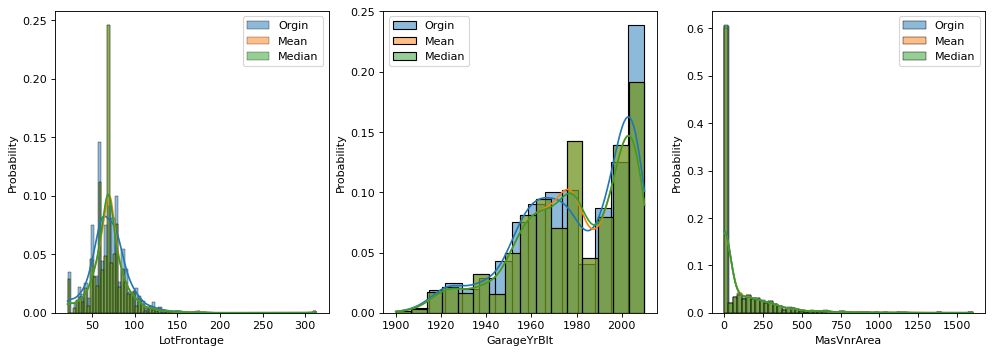

In [6]:
# 繪圖
""" Your code hear: """

var = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

colors = ['tab:blue', 'tab:orange', 'tab:green']
names = ['Orgin', 'Mean', 'Median']

plt.figure(figsize = (15, 5), dpi = 80)
for d in range(len(var)):
    plt.subplot(1, 3, d+1)
    dataset = [target[var[d]], target_mean[var[d]], target_median[var[d]]]
    for i in range(3):
        sns.histplot(dataset[i], kde = True, stat = 'probability', element = 'bars', label = names[i], color = colors[i])
    plt.legend()
plt.show()



## 分析標準差

In [7]:
""" Your code hear: """

var = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for d in range(len(var)):
    dataset = [target[var[d]], target_mean[var[d]], target_median[var[d]]]
    print(var[d])
    for i in range(3):
        std_result = dataset[i].std()
        if i == 0:
            print(f'Orgin:{std_result}')
        elif i == 1:
            print(f'Mean:{std_result}')
        elif i == 2:
            print(f'Median:{std_result}')
print()

LotFrontage
Orgin:24.28475177448317
Mean:22.02402268870693
Median:22.027677088952437
GarageYrBlt
Orgin:24.689724768590203
Mean:23.994583259057613
Median:23.997021528934187
MasVnrArea
Orgin:181.06620658721764
Mean:180.5691124259731
Median:180.73137335812245



## 透過分析標準差可以得到什麼結果？

#### ANS: 了解不同的缺失值處理對最後資料的離散情形的影響